# 월간 DACON

In [62]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Keras
from keras.models import *
from keras.layers import *
from keras.optimizers import *

****

## 질문 리스트
****

#### Q_A / Q_E (a~t) 비식별화를 위해 일부 질문은 Secret 처리
* Qa : Secret
* Qb : 대부분의 범죄자들과 다른 사람들의 가장 큰 차이점은 범인들이 잡힐 만큼 어리석다는 것이다.
* Qc : 다른 사람을 전적으로 신뢰하는 사람은 누구나 말썽을 일으키고 있다.
* Qd : Secret
* Qe : P.T. Barnum은 매 순간 어리버리가 태어난다고 말했을 때 틀렸다.
* Qf : 다른 사람에게 거짓말을 해도 변명의 여지가 없다.
* Qg : Secret
* Qh : 대부분의 사람들은 재산의 손실보다 부모의 죽음을 더 쉽게 잊는다.
* Qi : Secret
* Qj : 모든 사람이 악랄한 기질을 가지고 있으며 기회가 주어지면 나올 것이라고 보는 것이 가장 안전하다.
* Qk : 대체로 중요하고 정직하지 못한 것보다는 겸손하고 정직해지는 것이 낫다.
* Ql : Secret
* Qm : 여기저기서 모퉁이를 돌지 않고는 출세하기 어렵다.
* Qn : Secret
* Qo : 사람들을 다루는 가장 좋은 방법은 그들이 듣고 싶은 말을 하는 것이다.
* Qp : Secret
* Qq : 대부분의 사람들은 기본적으로 착하고 친절하다.
* Qr : 도덕적으로 옳다고 확신할 때만 행동을 취해야 한다.
* Qs : 중요한 사람들에게 아첨하는 것은 현명하다.
* Qt : Secret

#### Q_E(a~t) : 질문을 답할 때까지의 시간

#### age_group : 연령

#### education : 교육 수준
* 1 = Less than high school
* 2 = High school
* 3 = University degree
* 4 = Graduate degree
* 0 = 무응답

#### engnat : 모국어가 영어
* 1 = Yes
* 2 = No
* 0 = 무응답

#### familysize : 형제자매 수



#### gender : 성별
* Male, Female

#### hand : 필기하는 손
* 1 = Right
* 2 = Left
* 3 = Both
* 0 = 무응답

#### married : 혼인 상태
* 1 = Never married
* 2 = Currently married
* 3 = Previously married
* 0 = Other

#### race : 인종
* Asian, Arab, Black, Indigenous Australian, Native American, White, Other

#### religion : 종교
* Agnostic, Atheist, Buddhist, Christian_Catholic, Christian_Mormon, Christian_Protestant, Christian_Other, Hindu, Jewish, Muslim, Sikh, Other



#### tp__(01~07) : items were rated "I see myself as:" _____ such that
* tp01 : Extraverted, enthusiastic.
* tp02 : Critical, quarrelsome.
* tp03 : Dependable, self-disciplined.
* tp04 : Anxious, easily upset.
* tp05 : Open to new experiences, complex.
* tp06 : Reserved, quiet.
* tp07 : Sympathetic, warm.
* tp08 : Disorganized, careless.
* tp09 : Calm, emotionally stable.
* tp10 : Conventional, uncreative.
								

****
### 순서형 변수


#### urban : 유년기의 거주 구역
* 1 = Rural(country side)
* 2 = Suburban
* 3 = Urban(town, city)
* 0 = 무응답

#### wr_(01~13) : 실존하는 해당 단어의 정의을 앎
* 1 = Yes
* 0 = No

#### wf_(01~03) : 허구인 단어의 정의를 앎
* 1 = Yes
* 0 = No

In [63]:
train = pd.read_csv('train.csv').iloc[:, 1:]
test = pd.read_csv("test_x.csv").iloc[:, 1:]
submission = pd.read_csv("sample_submission.csv")

In [64]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45532 entries, 0 to 45531
Data columns (total 77 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   QaA         45532 non-null  float64
 1   QaE         45532 non-null  int64  
 2   QbA         45532 non-null  float64
 3   QbE         45532 non-null  int64  
 4   QcA         45532 non-null  float64
 5   QcE         45532 non-null  int64  
 6   QdA         45532 non-null  float64
 7   QdE         45532 non-null  int64  
 8   QeA         45532 non-null  float64
 9   QeE         45532 non-null  int64  
 10  QfA         45532 non-null  float64
 11  QfE         45532 non-null  int64  
 12  QgA         45532 non-null  float64
 13  QgE         45532 non-null  int64  
 14  QhA         45532 non-null  float64
 15  QhE         45532 non-null  int64  
 16  QiA         45532 non-null  float64
 17  QiE         45532 non-null  int64  
 18  QjA         45532 non-null  float64
 19  QjE         45532 non-nul

In [65]:
train.describe()

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
count,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,45532.000000,45532.000000,4.553200e+04,45532.000000,4.553200e+04,...,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000
mean,2.129535,9.453570e+02,2.904463,2.189589e+03,3.662347,1484.294518,1.749078,1.490672e+03,2.317952,1.899292e+03,...,0.868708,0.895722,0.328538,0.938900,0.972195,0.202824,0.946104,0.395195,0.947729,0.927040
std,1.196952,1.307565e+04,1.566142,3.351027e+04,1.431494,8977.664318,1.043625,1.092260e+04,1.369205,1.670765e+04,...,0.337723,0.305625,0.469687,0.239516,0.164414,0.402107,0.225815,0.488898,0.222575,0.260073
min,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,25.000000,1.000000,2.600000e+01,1.000000,2.500000e+01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,4.040000e+02,1.000000,8.750000e+02,2.000000,651.000000,1.000000,6.790000e+02,1.000000,8.340000e+02,...,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
50%,2.000000,5.570000e+02,3.000000,1.218000e+03,4.000000,899.000000,1.000000,9.310000e+02,2.000000,1.154000e+03,...,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
75%,3.000000,8.270000e+02,4.000000,1.838000e+03,5.000000,1335.000000,2.000000,1.355000e+03,3.000000,1.656000e+03,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,5.000000,2.413960e+06,5.000000,5.580395e+06,5.000000,871557.000000,5.000000,1.552821e+06,5.000000,1.919926e+06,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [66]:
test.describe()

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
count,11383.000000,11383.000000,11383.000000,1.138300e+04,11383.000000,1.138300e+04,11383.000000,1.138300e+04,11383.000000,1.138300e+04,...,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.00000,11383.000000
mean,2.094351,825.556268,2.930159,2.375705e+03,3.665027,4.627016e+03,1.733199,1.573476e+03,2.322498,1.908333e+03,...,0.873671,0.896424,0.328824,0.938329,0.972239,0.197487,0.946148,0.396117,0.95098,0.924976
std,1.182765,2450.121716,1.557470,5.109158e+04,1.433764,3.404012e+05,1.024850,1.932751e+04,1.368660,1.647452e+04,...,0.332234,0.304722,0.469806,0.240567,0.164294,0.398121,0.225736,0.489111,0.21592,0.263442
min,1.000000,26.000000,1.000000,2.900000e+01,1.000000,2.700000e+01,1.000000,2.800000e+01,1.000000,2.900000e+01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,1.000000,403.000000,1.000000,8.830000e+02,2.000000,6.560000e+02,1.000000,6.710000e+02,1.000000,8.300000e+02,...,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.00000,1.000000
50%,2.000000,559.000000,3.000000,1.226000e+03,4.000000,9.010000e+02,1.000000,9.230000e+02,2.000000,1.149000e+03,...,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.00000,1.000000
75%,3.000000,828.000000,4.000000,1.815000e+03,5.000000,1.335500e+03,2.000000,1.359000e+03,3.000000,1.649000e+03,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.00000,1.000000
max,5.000000,150104.000000,5.000000,5.381662e+06,5.000000,3.630804e+07,5.000000,1.976418e+06,5.000000,1.580136e+06,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


In [67]:
question = train.columns[(train.columns.str.startswith("Q")) & (train.columns.str.endswith('A'))]
answer = train.columns[(train.columns.str.startswith("Q")) & (train.columns.str.endswith('E'))]

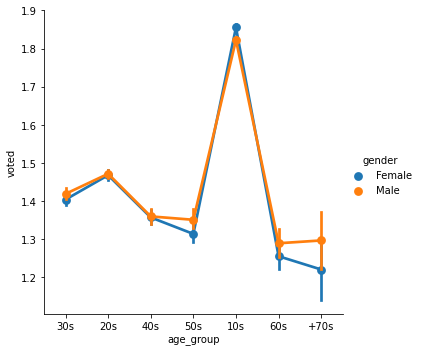

In [68]:
sns.catplot(x = "age_group", y = "voted", kind = 'point', data = train, hue = 'gender')

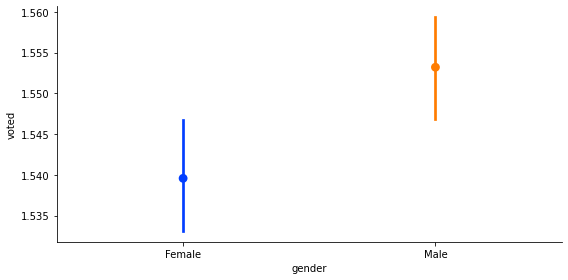

In [70]:
sns.catplot(x = "gender", y = "voted", kind = 'point', data = train,  height = 4, aspect = 2, palette = 'bright')

In [71]:
train['gender'] = [1 if x == 'male' else 0 for x in train.gender]
test['gender'] = [1 if x == 'male' else 0 for x in test.gender]

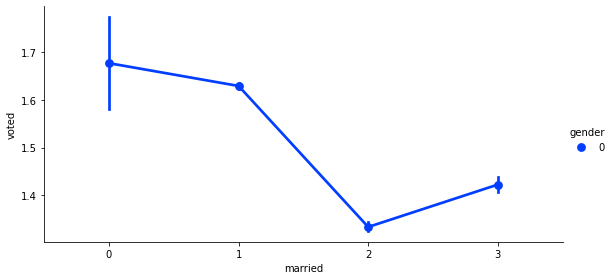

In [72]:
sns.catplot(x = "married", y = "voted", kind = 'point', data = train, hue = 'gender', height = 4, aspect = 2, palette = 'bright')

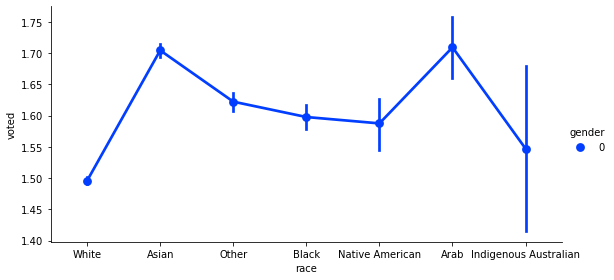

In [73]:
sns.catplot(x = "race", y = "voted", kind = 'point', data = train, hue = 'gender', height = 4, aspect = 2, palette = 'bright')

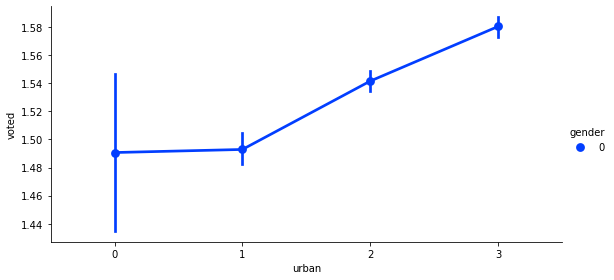

In [74]:
sns.catplot(x = "urban", y = "voted", kind = 'point', data = train, hue = 'gender', height = 4, aspect = 2, palette = 'bright')

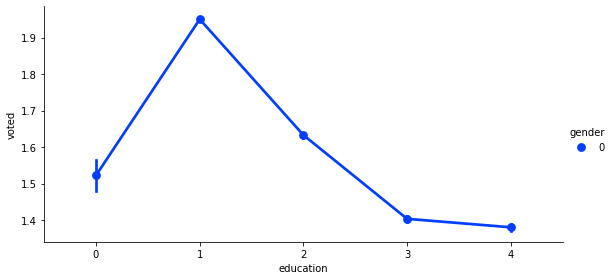

In [75]:
sns.catplot(x = "education", y = "voted", kind = 'point', data = train, hue = 'gender', height = 4, aspect = 2, palette = 'bright')

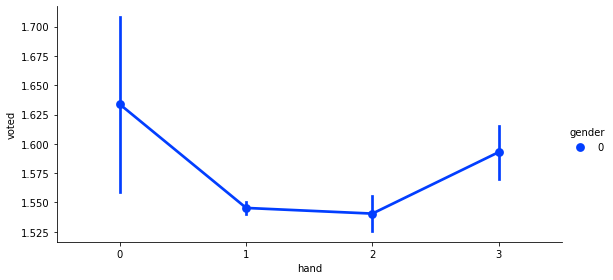

In [76]:
sns.catplot(x = "hand", y = "voted", kind = 'point', data = train, hue = 'gender', height = 4, aspect = 2, palette = 'bright')

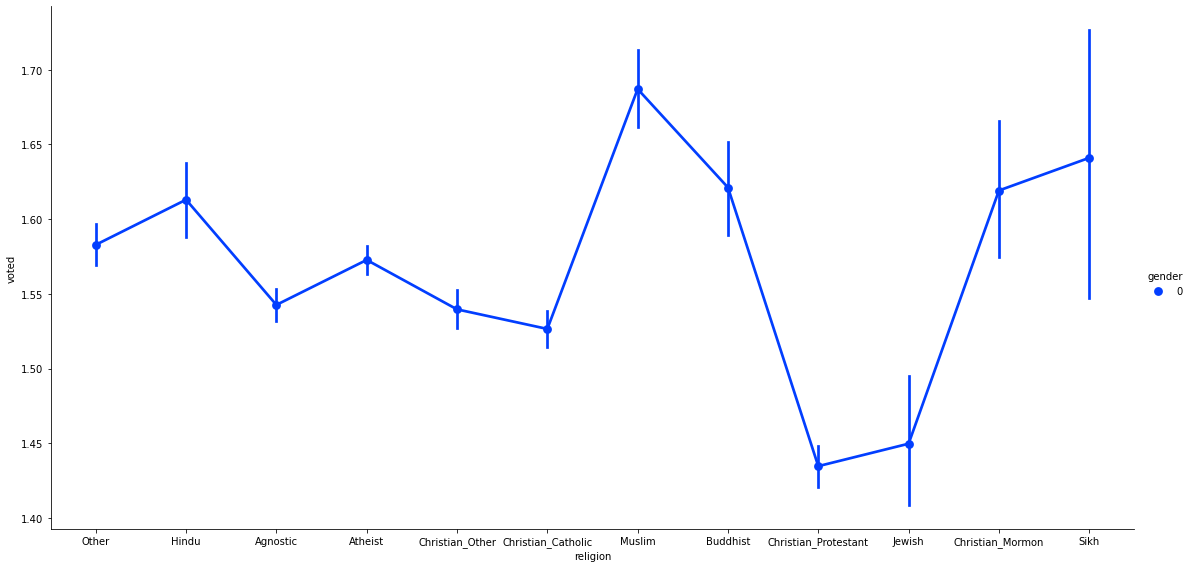

In [77]:
sns.catplot(x = "religion", y = "voted", kind = 'point', data = train, hue = 'gender', height = 8, aspect = 2, palette = 'bright')

In [78]:
flipping_columns = ["QeA", "QfA", "QkA", "QqA", "QrA"]
for flip in flipping_columns: 
    train[flip] = 6 - train[flip]

for flip in flipping_columns: 
    test[flip] = 6 - test[flip]   
    
flipping_secret_columns = ["QaA", "QdA", "QgA", "QiA", "QnA"]
for flip in flipping_secret_columns: 
    train[flip] = 6 - train[flip]

for flip in flipping_secret_columns: 
    test[flip] = 6 - test[flip]

In [79]:
q_secret = ['QaA', 'QdA', 'QgA', 'QiA', 'QlA', 'QnA', 'QpA', 'QtA']

In [80]:
train['secret_mean'] = train[question].mean(axis = 1)
test['secret_mean'] = test[question].mean(axis = 1)

In [81]:
train['time_mean'] = train[answer].mean(axis = 1)
test['time_mean'] = test[answer].mean(axis = 1)

In [82]:
train['tp_mean'] = train[train.columns[train.columns.str.startswith('tp')]].mean(axis = 1)
test['tp_mean'] = test[test.columns[test.columns.str.startswith('tp')]].mean(axis = 1)

In [83]:
train['ct_know_wr'] = [list(x).count(1) for x in train[train.columns[train.columns.str.startswith('wr')]].values]
test['ct_know_wr'] = [list(x).count(1) for x in test[test.columns[test.columns.str.startswith('wr')]].values]

In [84]:
train['ct_know_wf'] = [list(x).count(1) for x in train[train.columns[train.columns.str.startswith('wf')]].values]
test['ct_know_wf'] = [list(x).count(1) for x in test[test.columns[test.columns.str.startswith('wf')]].values]

In [85]:
numeric_col = train.columns[train.dtypes != 'object']

In [86]:
skew_df = pd.DataFrame({'before' : list(abs(train[numeric_col].skew())), 'after' : list(abs(np.log1p(train[numeric_col]).skew()))}, index = numeric_col)

In [87]:
skew_df['gap'] = abs(skew_df.before) - abs(skew_df.after)

In [88]:
train[skew_df.loc[skew_df.gap > 1].index] = np.log1p(train[skew_df.loc[skew_df.gap > 1].index])
test[skew_df.loc[skew_df.gap > 1].index] = np.log1p(test[skew_df.loc[skew_df.gap > 1].index])

In [37]:
from xgboost import XGBClassifier, XGBRFClassifier
from lightgbm import LGBMClassifier
from ngboost import NGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from bayes_opt import BayesianOptimization
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif

## basic model


In [38]:
kf = StratifiedKFold(n_splits = 10, random_state = 156, shuffle = True)

In [39]:
scaler = StandardScaler()

In [89]:
tr = pd.get_dummies(columns = train.columns[train.dtypes == 'object'], data = train).drop('voted', axis = 1)
te = pd.get_dummies(columns = train.columns[train.dtypes == 'object'], data = test)

In [90]:
X = pd.DataFrame(scaler.fit_transform(tr), columns = tr.columns)

In [91]:
y = train.voted

In [92]:
lgbm = LGBMClassifier(seed = 1021, max_depth = 5)
xgb = XGBRFClassifier(seed = 2020, max_depth = 6)
gbm = GradientBoostingClassifier(random_state = 209)
cat = CatBoostClassifier(random_state = 777)
ngb = NGBClassifier(random_state = 2019)

In [95]:
cv_gbm = cross_val_score(gbm, X, y, cv = kf, n_jobs = -1, scoring = 'roc_auc')

In [96]:
cv_gbm.mean(), cv_gbm.std()

(0.7658798778718303, 0.005636409122880063)

In [93]:
cv_lgbm = cross_val_score(lgbm, X, y, cv = kf, n_jobs = -1, scoring = 'roc_auc')

In [94]:
cv_lgbm.mean(), cv_lgbm.std()

(0.7677633047640798, 0.005707586601736356)

In [97]:
cv_xgb = cross_val_score(xgb, X, y, cv = kf, n_jobs = -1, scoring = 'roc_auc')

In [98]:
cv_xgb.mean()

0.7625645838078259

In [50]:
cv_cat = cross_val_score(cat, X, y, cv = kf, n_jobs = -1, scoring = 'roc_auc')

In [51]:
cv_cat.mean()

0.7660481827240748

In [622]:
lgbm.fit(X, y)
xgb.fit(X, y)
cat.fit(X, y)
gbm.fit(X, y)

Learning rate set to 0.052606
0:	learn: 0.6762605	total: 26.6ms	remaining: 26.6s
1:	learn: 0.6625609	total: 47.2ms	remaining: 23.5s
2:	learn: 0.6528207	total: 69.5ms	remaining: 23.1s
3:	learn: 0.6416641	total: 88ms	remaining: 21.9s
4:	learn: 0.6338401	total: 112ms	remaining: 22.2s
5:	learn: 0.6269672	total: 132ms	remaining: 21.8s
6:	learn: 0.6209108	total: 149ms	remaining: 21.2s
7:	learn: 0.6162204	total: 170ms	remaining: 21.1s
8:	learn: 0.6113567	total: 200ms	remaining: 22.1s
9:	learn: 0.6068720	total: 221ms	remaining: 21.9s
10:	learn: 0.6018554	total: 245ms	remaining: 22s
11:	learn: 0.5984467	total: 264ms	remaining: 21.7s
12:	learn: 0.5954665	total: 285ms	remaining: 21.6s
13:	learn: 0.5932027	total: 303ms	remaining: 21.4s
14:	learn: 0.5892911	total: 323ms	remaining: 21.2s
15:	learn: 0.5870652	total: 343ms	remaining: 21.1s
16:	learn: 0.5852291	total: 361ms	remaining: 20.9s
17:	learn: 0.5833496	total: 392ms	remaining: 21.4s
18:	learn: 0.5807790	total: 417ms	remaining: 21.5s
19:	learn: 

165:	learn: 0.5437695	total: 3.79s	remaining: 19s
166:	learn: 0.5436492	total: 3.81s	remaining: 19s
167:	learn: 0.5435563	total: 3.83s	remaining: 19s
168:	learn: 0.5434216	total: 3.85s	remaining: 18.9s
169:	learn: 0.5432347	total: 3.88s	remaining: 18.9s
170:	learn: 0.5431335	total: 3.89s	remaining: 18.9s
171:	learn: 0.5430508	total: 3.91s	remaining: 18.8s
172:	learn: 0.5429590	total: 3.93s	remaining: 18.8s
173:	learn: 0.5428212	total: 3.95s	remaining: 18.8s
174:	learn: 0.5426861	total: 3.98s	remaining: 18.7s
175:	learn: 0.5425891	total: 4s	remaining: 18.7s
176:	learn: 0.5424720	total: 4.02s	remaining: 18.7s
177:	learn: 0.5423860	total: 4.04s	remaining: 18.6s
178:	learn: 0.5422733	total: 4.06s	remaining: 18.6s
179:	learn: 0.5421443	total: 4.08s	remaining: 18.6s
180:	learn: 0.5420242	total: 4.11s	remaining: 18.6s
181:	learn: 0.5419153	total: 4.14s	remaining: 18.6s
182:	learn: 0.5418339	total: 4.18s	remaining: 18.7s
183:	learn: 0.5417340	total: 4.21s	remaining: 18.7s
184:	learn: 0.5415754

325:	learn: 0.5231951	total: 7.4s	remaining: 15.3s
326:	learn: 0.5230775	total: 7.46s	remaining: 15.4s
327:	learn: 0.5229390	total: 7.5s	remaining: 15.4s
328:	learn: 0.5228155	total: 7.54s	remaining: 15.4s
329:	learn: 0.5226886	total: 7.57s	remaining: 15.4s
330:	learn: 0.5225663	total: 7.59s	remaining: 15.3s
331:	learn: 0.5224457	total: 7.62s	remaining: 15.3s
332:	learn: 0.5223113	total: 7.65s	remaining: 15.3s
333:	learn: 0.5221876	total: 7.67s	remaining: 15.3s
334:	learn: 0.5220816	total: 7.71s	remaining: 15.3s
335:	learn: 0.5219922	total: 7.73s	remaining: 15.3s
336:	learn: 0.5218517	total: 7.76s	remaining: 15.3s
337:	learn: 0.5217153	total: 7.79s	remaining: 15.3s
338:	learn: 0.5215696	total: 7.82s	remaining: 15.2s
339:	learn: 0.5214600	total: 7.84s	remaining: 15.2s
340:	learn: 0.5213174	total: 7.89s	remaining: 15.2s
341:	learn: 0.5212302	total: 7.93s	remaining: 15.3s
342:	learn: 0.5211238	total: 7.96s	remaining: 15.2s
343:	learn: 0.5210139	total: 7.99s	remaining: 15.2s
344:	learn: 0.

488:	learn: 0.5042820	total: 11.8s	remaining: 12.4s
489:	learn: 0.5041565	total: 11.8s	remaining: 12.3s
490:	learn: 0.5040860	total: 11.9s	remaining: 12.3s
491:	learn: 0.5039788	total: 11.9s	remaining: 12.3s
492:	learn: 0.5038610	total: 11.9s	remaining: 12.2s
493:	learn: 0.5037532	total: 11.9s	remaining: 12.2s
494:	learn: 0.5036501	total: 11.9s	remaining: 12.2s
495:	learn: 0.5035075	total: 12s	remaining: 12.2s
496:	learn: 0.5033940	total: 12s	remaining: 12.1s
497:	learn: 0.5033080	total: 12s	remaining: 12.1s
498:	learn: 0.5032091	total: 12s	remaining: 12.1s
499:	learn: 0.5030822	total: 12s	remaining: 12s
500:	learn: 0.5029912	total: 12.1s	remaining: 12s
501:	learn: 0.5028721	total: 12.1s	remaining: 12s
502:	learn: 0.5028051	total: 12.1s	remaining: 12s
503:	learn: 0.5027376	total: 12.1s	remaining: 11.9s
504:	learn: 0.5026390	total: 12.1s	remaining: 11.9s
505:	learn: 0.5025130	total: 12.2s	remaining: 11.9s
506:	learn: 0.5024075	total: 12.2s	remaining: 11.8s
507:	learn: 0.5022759	total: 1

653:	learn: 0.4865316	total: 15.8s	remaining: 8.34s
654:	learn: 0.4864252	total: 15.8s	remaining: 8.32s
655:	learn: 0.4863366	total: 15.8s	remaining: 8.29s
656:	learn: 0.4862353	total: 15.8s	remaining: 8.26s
657:	learn: 0.4861374	total: 15.8s	remaining: 8.24s
658:	learn: 0.4860590	total: 15.9s	remaining: 8.21s
659:	learn: 0.4859659	total: 15.9s	remaining: 8.18s
660:	learn: 0.4858598	total: 15.9s	remaining: 8.16s
661:	learn: 0.4857690	total: 15.9s	remaining: 8.13s
662:	learn: 0.4856889	total: 15.9s	remaining: 8.1s
663:	learn: 0.4855984	total: 16s	remaining: 8.08s
664:	learn: 0.4854766	total: 16s	remaining: 8.05s
665:	learn: 0.4853574	total: 16s	remaining: 8.02s
666:	learn: 0.4852597	total: 16s	remaining: 8s
667:	learn: 0.4852083	total: 16s	remaining: 7.97s
668:	learn: 0.4851266	total: 16s	remaining: 7.94s
669:	learn: 0.4850150	total: 16.1s	remaining: 7.91s
670:	learn: 0.4849015	total: 16.1s	remaining: 7.89s
671:	learn: 0.4848088	total: 16.1s	remaining: 7.86s
672:	learn: 0.4846892	total:

813:	learn: 0.4704599	total: 19.1s	remaining: 4.37s
814:	learn: 0.4703432	total: 19.1s	remaining: 4.35s
815:	learn: 0.4702387	total: 19.2s	remaining: 4.32s
816:	learn: 0.4701299	total: 19.2s	remaining: 4.3s
817:	learn: 0.4700032	total: 19.2s	remaining: 4.27s
818:	learn: 0.4699150	total: 19.2s	remaining: 4.25s
819:	learn: 0.4698052	total: 19.2s	remaining: 4.22s
820:	learn: 0.4697048	total: 19.3s	remaining: 4.2s
821:	learn: 0.4696194	total: 19.3s	remaining: 4.17s
822:	learn: 0.4695295	total: 19.3s	remaining: 4.15s
823:	learn: 0.4694282	total: 19.3s	remaining: 4.13s
824:	learn: 0.4693336	total: 19.3s	remaining: 4.1s
825:	learn: 0.4691861	total: 19.4s	remaining: 4.08s
826:	learn: 0.4690990	total: 19.4s	remaining: 4.05s
827:	learn: 0.4689980	total: 19.4s	remaining: 4.03s
828:	learn: 0.4689245	total: 19.4s	remaining: 4.01s
829:	learn: 0.4688200	total: 19.4s	remaining: 3.98s
830:	learn: 0.4687061	total: 19.5s	remaining: 3.96s
831:	learn: 0.4685875	total: 19.5s	remaining: 3.94s
832:	learn: 0.4

972:	learn: 0.4552158	total: 22.7s	remaining: 630ms
973:	learn: 0.4551241	total: 22.7s	remaining: 607ms
974:	learn: 0.4550149	total: 22.7s	remaining: 583ms
975:	learn: 0.4549349	total: 22.8s	remaining: 560ms
976:	learn: 0.4548083	total: 22.8s	remaining: 537ms
977:	learn: 0.4547243	total: 22.8s	remaining: 514ms
978:	learn: 0.4546401	total: 22.9s	remaining: 490ms
979:	learn: 0.4545555	total: 22.9s	remaining: 467ms
980:	learn: 0.4544506	total: 22.9s	remaining: 444ms
981:	learn: 0.4543405	total: 23s	remaining: 421ms
982:	learn: 0.4542336	total: 23s	remaining: 398ms
983:	learn: 0.4541327	total: 23.1s	remaining: 375ms
984:	learn: 0.4540460	total: 23.1s	remaining: 352ms
985:	learn: 0.4539504	total: 23.1s	remaining: 329ms
986:	learn: 0.4538847	total: 23.2s	remaining: 305ms
987:	learn: 0.4537698	total: 23.2s	remaining: 282ms
988:	learn: 0.4536839	total: 23.2s	remaining: 259ms
989:	learn: 0.4535910	total: 23.3s	remaining: 235ms
990:	learn: 0.4534943	total: 23.3s	remaining: 211ms
991:	learn: 0.45

GradientBoostingClassifier(random_state=209)

In [623]:
vot = EnsembleVoteClassifier(clfs = [lgbm, gbm, cat, xgb], voting = 'soft')

In [624]:
cv_vot = cross_val_score(vot, X, y ,cv = kf, n_jobs = -1)

In [625]:
cv_vot.mean()

0.6973995872166213

In [99]:
# 하이퍼 파라미터 범위

pbounds = { 'learning_rate': (0.0001, 0.4),
            'n_estimators': (16, 1024),
            'max_depth': (3,10),   
            'subsample': (0.5, 1),  
            'colsample_bytree': (0.5, 1),   
            'gamma': (0, 5)}

def xgb_opt(learning_rate, n_estimators, max_depth, subsample, colsample_bytree, gamma):
    
    params = {
        'learning_rate': learning_rate,
        'n_estimators' : int(round(n_estimators)),
        'max_depth' : int(round(max_depth)),
        'subsample': subsample,
        'colsample_bytree': colsample_bytree,   
        'gamma': gamma,
        'n_jobs' : -1,
        'random_state' : 777
    }
    
    xgb = XGBRFClassifier(**params)
    
    kf = StratifiedKFold(n_splits = 4 , shuffle=True, random_state=50)

    score = cross_val_score(xgb, X, y, scoring='roc_auc', cv=kf, n_jobs=-1)
    
    return np.mean(score)

BO_xgb = BayesianOptimization(f = xgb_opt, pbounds = pbounds, random_state=0)
BO_xgb.maximize(init_points= 10, n_iter = 50)

|   iter    |  target   | colsam... |   gamma   | learni... | max_depth | n_esti... | subsample |
-------------------------------------------------------------------------------------------------
|  1        |  0.7642   |  0.7744   |  3.576    |  0.2411   |  6.814    |  443.0    |  0.8229   |
|  2        |  0.7635   |  0.7188   |  4.459    |  0.3855   |  5.684    |  814.1    |  0.7644   |
|  3        |  0.758    |  0.784    |  4.628    |  0.02851  |  3.61     |  36.38    |  0.9163   |
|  4        |  0.7636   |  0.8891   |  4.35     |  0.3914   |  8.594    |  481.2    |  0.8903   |
|  5        |  0.7644   |  0.5591   |  3.2      |  0.05743  |  9.613    |  542.0    |  0.7073   |
|  6        |  0.7633   |  0.6323   |  3.871    |  0.1825   |  6.979    |  34.94    |  0.8088   |
|  7        |  0.7644   |  0.806    |  3.085    |  0.3775   |  7.773    |  378.4    |  0.7185   |
|  8        |  0.764    |  0.8488   |  0.3011   |  0.2667   |  7.694    |  228.1    |  0.5645   |
|  9        |  0.763

|  51       |  0.763    |  0.9692   |  1.076    |  0.1415   |  7.932    |  545.6    |  0.7479   |
|  52       |  0.7643   |  0.5703   |  4.293    |  0.05926  |  9.158    |  539.7    |  0.6143   |
|  53       |  0.7634   |  0.6939   |  0.303    |  0.05796  |  5.905    |  542.1    |  0.9935   |
|  54       |  0.7632   |  0.6003   |  4.807    |  0.394    |  6.284    |  445.2    |  0.9068   |
|  55       |  0.7645   |  0.5      |  2.432    |  0.4      |  10.0     |  545.9    |  1.0      |
|  56       |  0.7643   |  0.8193   |  3.216    |  0.06523  |  8.766    |  536.8    |  0.8249   |
|  57       |  0.7626   |  0.5571   |  4.761    |  0.3006   |  6.277    |  539.6    |  0.6376   |
|  58       |  0.7647   |  0.7474   |  1.104    |  0.3557   |  9.705    |  535.1    |  0.7243   |
|  59       |  0.7644   |  0.6639   |  2.399    |  0.2023   |  7.578    |  534.2    |  0.5056   |
|  60       |  0.7647   |  0.6495   |  4.556    |  0.3282   |  9.931    |  534.7    |  0.8373   |


In [100]:
params = BO_xgb.max['params']
params['max_depth'] = int(round(params['max_depth']))
params['n_estimators'] = int(round(params['n_estimators']))

In [102]:
xgb = XGBRFClassifier(random_state = 1014, **params)
xgb.fit(X, y)
pred1 = xgb.predict_proba(te)[:, 1]

In [103]:
cv_xgb = cross_val_score(xgb, X, y, cv = kf, n_jobs = -1, scoring = 'roc_auc')

In [104]:
cv_xgb.mean()

0.7657781919999846

In [108]:
pbounds = {'learning_rate' : (0.0001, 0.05),
           'num_leaves': (64, 512),
           'max_depth': (2, 15),
           'min_child_weight': (30, 100),
           'colsample_bytree': (0, 1),
           'feature_fraction': (0.001, 1),
           'bagging_fraction': (0.001, 1),
           'lambda_l1' : (0, 0.99),
           'lambda_l2' : (0, 0.99),
           'subsample' : (0, 1),
           'n_estimators' : (8,512)
          }
def lgbm_opt(learning_rate, n_estimators, max_depth, subsample, colsample_bytree, num_leaves, min_child_weight,bagging_fraction, feature_fraction,lambda_l1, lambda_l2):

    params = {
        'learning_rate': learning_rate,
        'n_estimators' : int(round(n_estimators)),
        'max_depth' : int(round(max_depth)),
        'subsample': subsample,
        'colsample_bytree' : colsample_bytree,
        'num_leaves' : int(round(num_leaves)),
        'min_child_weight' : min_child_weight,
        'n_jobs' : -1,
        'bagging_fraction' : bagging_fraction,
        'feature_fraction' : feature_fraction,
        'lambda_l1' : lambda_l1,
        'lambda_l2' : lambda_l2
    }
    
    lgbm = LGBMClassifier(**params)
    
    kf = StratifiedKFold(n_splits=4 , shuffle=True, random_state=50)

    score = cross_val_score(lgbm, X, y, scoring='roc_auc', cv=kf, n_jobs=-1)
    
    return np.mean(score)

BO_lgbm = BayesianOptimization(f = lgbm_opt, pbounds = pbounds, random_state=1)  
BO_lgbm.maximize(init_points= 10, n_iter = 150)

|   iter    |  target   | baggin... | colsam... | featur... | lambda_l1 | lambda_l2 | learni... | max_depth | min_ch... | n_esti... | num_le... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------------------------------
|  1        |  0.6991   |  0.4176   |  0.7203   |  0.001114 |  0.2993   |  0.1453   |  0.004708 |  4.421    |  54.19    |  208.0    |  305.4    |  0.4192   |
|  2        |  0.7651   |  0.6855   |  0.2045   |  0.8782   |  0.02711  |  0.6638   |  0.02092  |  9.263    |  39.83    |  107.8    |  422.7    |  0.9683   |
|  3        |  0.7569   |  0.3141   |  0.6923   |  0.8765   |  0.8857   |  0.08419  |  0.002049 |  4.208    |  91.47    |  57.57    |  252.7    |  0.9579   |
|  4        |  0.7598   |  0.5336   |  0.6919   |  0.3162   |  0.6796   |  0.8263   |  0.001013 |  11.75    |  99.22    |  385.1    |  189.6    |  0.7893   |
|  5        |  0.7458   |  0.1041   |  0.4479   |  0

|  31       |  0.7592   |  0.8619   |  0.7829   |  0.1085   |  0.5834   |  0.03747  |  0.03738  |  9.012    |  98.09    |  164.2    |  459.4    |  0.9931   |
|  32       |  0.7164   |  1.0      |  1.0      |  1.0      |  0.0      |  0.0      |  0.0001   |  2.0      |  100.0    |  8.0      |  64.0     |  0.0      |
|  33       |  0.7094   |  0.001    |  0.0      |  0.001    |  0.0      |  0.0      |  0.0001   |  2.0      |  100.0    |  512.0    |  404.8    |  1.0      |
|  34       |  0.7666   |  0.9956   |  0.4602   |  0.6263   |  0.5985   |  0.3803   |  0.01073  |  13.83    |  98.26    |  397.7    |  451.7    |  0.3251   |
|  35       |  0.7662   |  0.0417   |  0.6949   |  0.2113   |  0.07574  |  0.5115   |  0.03438  |  8.903    |  99.55    |  352.1    |  339.8    |  0.8407   |
|  36       |  0.7553   |  1.0      |  0.0      |  1.0      |  0.99     |  0.99     |  0.05     |  15.0     |  30.0     |  8.0      |  292.6    |  1.0      |
|  37       |  0.7648   |  0.1942   |  0.7005   |  0

|  63       |  0.7604   |  0.2939   |  0.6257   |  0.3277   |  0.3332   |  0.3337   |  0.04776  |  12.24    |  53.69    |  430.4    |  213.9    |  0.5887   |
|  64       |  0.7568   |  0.3002   |  0.5396   |  0.07591  |  0.9103   |  0.2625   |  0.01771  |  7.713    |  97.42    |  355.5    |  463.4    |  0.2669   |
|  65       |  0.7491   |  0.9561   |  0.1544   |  0.8321   |  0.04413  |  0.5043   |  0.002903 |  2.035    |  95.13    |  372.7    |  263.2    |  0.6403   |
|  66       |  0.7639   |  0.7987   |  0.6506   |  0.2512   |  0.04416  |  0.2705   |  0.04389  |  11.49    |  61.31    |  354.6    |  403.4    |  0.9127   |
|  67       |  0.7611   |  0.4481   |  0.1374   |  0.4007   |  0.2226   |  0.944    |  0.03898  |  12.79    |  40.74    |  475.5    |  142.5    |  0.3045   |
|  68       |  0.7671   |  0.1522   |  0.6621   |  0.6046   |  0.6556   |  0.2133   |  0.01485  |  12.96    |  77.72    |  323.9    |  333.9    |  0.3118   |
|  69       |  0.7669   |  1.0      |  1.0      |  0

|  95       |  0.763    |  0.7747   |  0.4781   |  0.7472   |  0.4183   |  0.7547   |  0.03778  |  14.98    |  51.8     |  315.3    |  383.1    |  0.6192   |
|  96       |  0.7648   |  0.6701   |  0.5399   |  0.704    |  0.6636   |  0.9458   |  0.02802  |  11.62    |  97.04    |  390.9    |  422.9    |  0.04153  |
|  97       |  0.7652   |  0.9188   |  0.4527   |  0.5363   |  0.001974 |  0.5736   |  0.003242 |  7.483    |  69.02    |  395.2    |  438.4    |  0.04107  |
|  98       |  0.7667   |  0.6774   |  0.5583   |  0.4721   |  0.7462   |  0.4177   |  0.04375  |  6.935    |  69.31    |  227.4    |  489.4    |  0.9336   |
|  99       |  0.7667   |  0.3506   |  0.554    |  0.5857   |  0.3821   |  0.2055   |  0.01795  |  14.7     |  97.51    |  217.2    |  471.0    |  0.509    |
|  100      |  0.7583   |  1.0      |  0.0      |  1.0      |  0.4374   |  0.8911   |  0.005494 |  2.9      |  90.15    |  466.6    |  302.5    |  0.0      |
|  101      |  0.7458   |  0.04046  |  0.6389   |  0

|  127      |  0.7663   |  0.7503   |  0.655    |  0.4277   |  0.3473   |  0.7888   |  0.02342  |  3.93     |  87.86    |  401.2    |  437.8    |  0.5799   |
|  128      |  0.7164   |  0.9896   |  0.618    |  0.02377  |  0.5747   |  0.6053   |  0.004723 |  12.92    |  68.32    |  336.9    |  418.5    |  0.07634  |
|  129      |  0.767    |  0.05172  |  0.5499   |  0.7636   |  0.466    |  0.4703   |  0.02351  |  6.59     |  47.46    |  326.3    |  349.9    |  0.4967   |
|  130      |  0.7641   |  0.6268   |  0.5369   |  0.4235   |  0.271    |  0.1231   |  0.04485  |  8.659    |  41.31    |  352.6    |  387.3    |  0.8765   |
|  131      |  0.7627   |  0.001    |  0.2519   |  0.8131   |  0.99     |  0.0      |  0.05     |  2.0      |  56.59    |  498.6    |  246.7    |  0.0      |
|  132      |  0.7585   |  0.5483   |  0.955    |  0.2776   |  0.4252   |  0.6685   |  0.01508  |  2.268    |  68.07    |  355.9    |  380.7    |  0.1569   |
|  133      |  0.6928   |  1.0      |  0.0      |  0

|  159      |  0.7229   |  0.971    |  1.0      |  1.0      |  0.99     |  0.99     |  0.000308 |  2.0      |  60.37    |  478.1    |  254.8    |  0.0      |
|  160      |  0.7455   |  0.6809   |  0.5776   |  0.02835  |  0.7636   |  0.4401   |  0.01775  |  2.045    |  37.11    |  489.9    |  270.5    |  0.3939   |


In [109]:
params = BO_lgbm.max['params']
params['max_depth'] = int(round(params['max_depth']))
params['n_estimators'] = int(round(params['n_estimators']))
params['num_leaves'] = int(round(params['num_leaves']))

In [110]:
lgbm = LGBMClassifier(random_state = 1014, **params)
lgbm.fit(X, y)
pred2 = lgbm.predict_proba(te)[:, 1]

[LightGBM] [Warning] feature_fraction is set=0.5169169432924249, colsample_bytree=0.27819442942628736 will be ignored. Current value: feature_fraction=0.5169169432924249
[LightGBM] [Warning] lambda_l1 is set=0.4722824051603848, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.4722824051603848
[LightGBM] [Warning] bagging_fraction is set=0.9896239353587307, subsample=0.6621618908060035 will be ignored. Current value: bagging_fraction=0.9896239353587307
[LightGBM] [Warning] lambda_l2 is set=0.07587195905479191, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.07587195905479191


In [61]:
pbounds = { 'learning_rate': (0.0005, 0.2),
            'n_estimators': (16, 512),
            'max_depth': (3,10),   
            'subsample': (0.5,1), 
            'min_samples_split': (2,5),   
            'min_samples_leaf': (1,5)}

def gbm_opt(learning_rate, n_estimators, max_depth, subsample, min_samples_split, min_samples_leaf):

    params = {
        'learning_rate': learning_rate,
        'n_estimators' : int(round(n_estimators)),
        'max_depth' : int(round(max_depth)),
        'subsample': subsample,
        'min_samples_split' : int(round(min_samples_split)),
        'min_samples_leaf' : int(round(min_samples_leaf))
    }
    
    gbm = GradientBoostingClassifier(**params)
    kf = StratifiedKFold(n_splits = 4 , shuffle = True, random_state=50)
    score = cross_val_score(gbm, X, y, scoring='roc_auc', cv = kf, n_jobs=-1)
    return np.mean(score)

BO_gbm = BayesianOptimization(f = gbm_opt, pbounds = pbounds, random_state=0)  
BO_gbm.maximize(init_points = 10, n_iter = 50)

|   iter    |  target   | learni... | max_depth | min_sa... | min_sa... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------
|  1        |  0.7494   |  0.11     |  8.006    |  3.411    |  3.635    |  226.1    |  0.8229   |
|  2        |  0.7518   |  0.0878   |  9.242    |  4.855    |  3.15     |  408.7    |  0.7644   |
|  3        |  0.7564   |  0.1138   |  9.479    |  1.284    |  2.261    |  26.03    |  0.9163   |
|  4        |  0.747    |  0.1557   |  9.09     |  4.914    |  4.397    |  244.9    |  0.8903   |
|  5        |  0.7655   |  0.0241   |  7.479    |  1.573    |  4.834    |  274.8    |  0.7073   |
|  6        |  0.761    |  0.05328  |  8.42     |  2.825    |  3.705    |  25.32    |  0.8088   |
|  7        |  0.7491   |  0.1226   |  7.319    |  4.775    |  4.045    |  194.3    |  0.7185   |
|  8        |  0.7641   |  0.1397   |  3.422    |  3.667    |  4.012    |  120.3    |  0.5645   |
|  9        |  0.754

|  51       |  0.738    |  0.1778   |  6.723    |  1.298    |  4.047    |  274.1    |  0.6923   |
|  52       |  0.7615   |  0.1385   |  3.708    |  2.19     |  3.003    |  245.6    |  0.9128   |
|  53       |  0.7644   |  0.0697   |  3.865    |  3.472    |  3.99     |  245.9    |  0.5675   |
|  54       |  0.7667   |  0.01301  |  6.911    |  1.494    |  4.334    |  424.9    |  0.8195   |
|  55       |  0.7623   |  0.09413  |  3.645    |  2.767    |  4.872    |  276.8    |  0.7509   |
|  56       |  0.753    |  0.003111 |  3.158    |  3.142    |  2.976    |  247.6    |  0.9656   |
|  57       |  0.7547   |  0.06719  |  7.626    |  1.373    |  4.643    |  424.9    |  0.8792   |
|  58       |  0.7529   |  0.06054  |  8.092    |  4.586    |  2.942    |  370.0    |  0.6423   |
|  59       |  0.7656   |  0.05258  |  4.63     |  4.174    |  2.718    |  248.0    |  0.7872   |
|  60       |  0.7492   |  0.09861  |  9.048    |  2.786    |  3.764    |  322.2    |  0.8459   |


In [ ]:
params = BO_gbm.max['params']
params['max_depth'] = int(round(params['max_depth']))
params['n_estimators'] = int(round(params['n_estimators']))
params['min_samples_leaf'] = int(round(params['min_samples_leaf']))
params['min_samples_split'] = int(round(params['min_samples_split']))

In [ ]:
gbc = GradientBoostingClassifier(random_state = 1014)

gbc.fit(X, y)

pred3 = gbc.predict_proba(target)[:, 1]

In [102]:
pred1 = lgbm.predict_proba(te)[:, 1]
pred2 = xgb.predict_proba(te)[:, 1]
pred3 = cat.predict_proba(te)[:, 1]
pred4 = ngb.predict_proba(te)[:, 1]

In [103]:
pred = (pred1 + pred2 + pred3 + pred4) / 4

In [104]:
submission['voted'] = pred

In [105]:
submission

,index,voted
0,0,0.624392
1,1,0.788914
2,2,0.468495
3,3,0.298496
4,4,0.708424
...,...,...
11378,11378,0.460722
11379,11379,0.787227
11380,11380,0.313791
11381,11381,0.405961


In [106]:
submission.to_csv('sub1021.csv', index = False)